In [4]:
import pandas as pd
import numpy as np
import os

### Import Training Set
Load each file and convert into a numpy vector (add it to a pandas dataframe).

There will be 1024 features (since the size is 32x32) for each digit followed by the digit label. The digit's label can be included from the file name.

In [5]:
"""Function to convert image to a vector"""
def img2vector(filename):
    returnVect = np.zeros((1,1024))
    fr = open(filename)
    for i in range(32):
        lineStr = fr.readline()
        for j in range(32):
            returnVect[0,32*i+j] = int(lineStr[j])
        
    return returnVect


### Convert all files to a vector and create a dataframe

Convert the training and testing data to numpy arrays and create a dataframe.

In [8]:
#Training data
path = '/home/sibi/acad/mach_learn_with_networks/assignment1/digits/trainingDigits/'
files = os.listdir(path)
df_train = pd.DataFrame(columns = range(1024))
i=0
y = np.array([])
for file in files:
    df_train.loc[i]=np.transpose(img2vector(path+file)[0])
    y = np.append(y,int(file[0]))
    i+=1
df_train[1024] = y
df_train = df_train.astype(int)


In [9]:
#Test data
path = '/home/sibi/acad/mach_learn_with_networks/assignment1/digits/testDigits/'
files = os.listdir(path)
df_test = pd.DataFrame(columns = range(1024))
i=0
y = np.array([])
for file in files:
    df_test.loc[i]=np.transpose(img2vector(path+file)[0])
    y = np.append(y,int(file[0]))
    i+=1
df_test[1024] = y
df_test = df_test.astype(int)


### Show one sample from each as a binary image

Pick one random binary text file and convert it to a binary image. Store the file.

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.image as mpimg
#data = img2vector("/home/sibi/acad/mach_learn_with_networks/assignment1/digits/trainingDigits/7_91.txt")


### Prepare data for KNN

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [14]:
X_train = df_train.loc[:,0:1023]
y_train = df_train.loc[:,1024]
X_test = df_test.loc[:,0:1023]
y_test = df_test.loc[:,1024]
#print(X_train.shape)
#print(y_train.shape)
#print(X_test.shape)
#print(y_test.shape)
#print(type(y_train[0]))


#### Training data set

In [33]:
train_accuracies = []
for n in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_train)
    train_accuracies.append(metrics.accuracy_score(y_train, y_pred))

#### Testing data set

In [16]:
test_accuracies = []
for n in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    test_accuracies.append(metrics.accuracy_score(y_test, y_pred))

#### Plotting

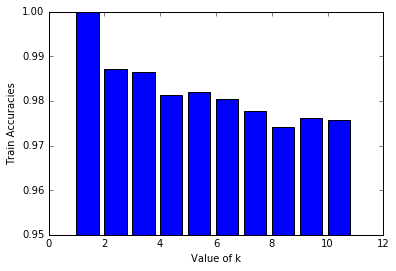

In [35]:
plt.bar(range(1,11),train_accuracies)
plt.ylim(0.95,1)
plt.ylabel("Train Accuracies")
plt.xlabel("Value of k")
plt.show()

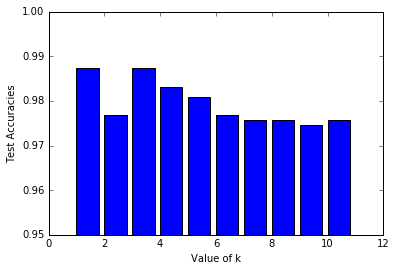

In [34]:
plt.bar(range(1,11),test_accuracies)
plt.ylim(0.95,1)
plt.ylabel("Test Accuracies")
plt.xlabel("Value of k")
plt.show()

------------------------------------------------------------